# Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read the Image

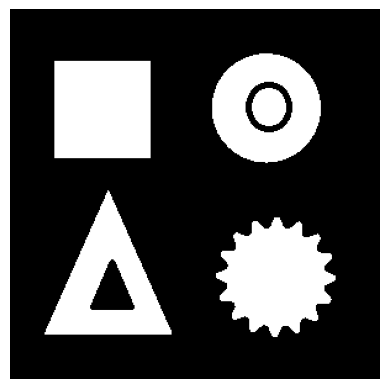

In [2]:
image = cv2.imread('images/shapes.png')

### Display
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));
plt.axis("off");

### Find and Draw Contours

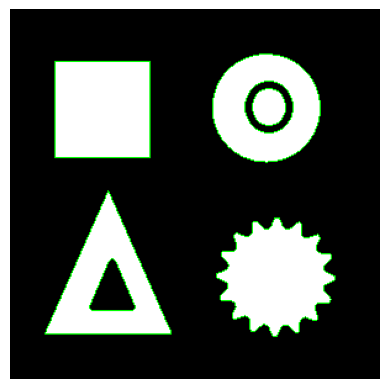

In [3]:
draw_image = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Detect Contours
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

### Draw Contours
draw_image = cv2.drawContours(image, contours, -1, (0,255,0), 1)

### Show
plt.imshow(cv2.cvtColor(draw_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

## Extracting the Largest Contours

### The detected contours are returned as a list of continous coordinates that form the shape of the object. Using cordinates and using built-in function max() we can retrieve the largest contour in the list. We pass a key to the max function given by cv2.contourArea.

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]


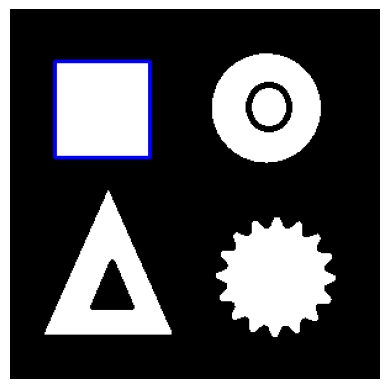

In [4]:
image = cv2.imread("images/shapes.png")
draw_image = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Find contours
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(hierarchy)
### Find the biggest contour
biggest_contour = max(contours, key = cv2.contourArea)

### Draw contours
cv2.drawContours(image, biggest_contour, -1, (255,0,0), 2)

### Display
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
plt.axis("off");

In [5]:
cv2.contourArea(biggest_contour)

6006.0

## Sorting Contours in terms of size

### The sorted() function can be used to retreieve contours on basis of size.

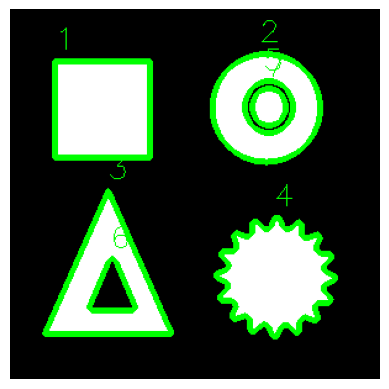

In [6]:
image = cv2.imread("images/shapes.png")
draw_image = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Find Contours
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

### sorted contours
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)

### Display contours based on area in sorted manner
for i, cont in enumerate(sorted_contours,1):
    
    ### Draw Contour
    cv2.drawContours(draw_image, cont, -1, (0,255,0),3 )
    
    ### In sorted List
    cv2.putText(draw_image, str(i), (cont[0,0,0],cont[0,0,-1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1)

plt.imshow(draw_image);
plt.axis("off");

## Drawing a rectangle around the contour.
    Straight Bounding Rectangle
    Rotated Rectangle

### Straight Bounding Rectangle

### Syntax : 
    x,y,w,h = cv2.boundingRect(array)
### Parameters:
    array : It is input gray-scale image or 2D point set from which the bounding rectangle is to be created.
### Returns:
    x : It is X-cordinate of the top-left corner.
    y : It is Y-cordinate of the top-left corner.
    w : It is the width of the rectangle.
    h : It is the height of the rectangle.

167 169 97 97


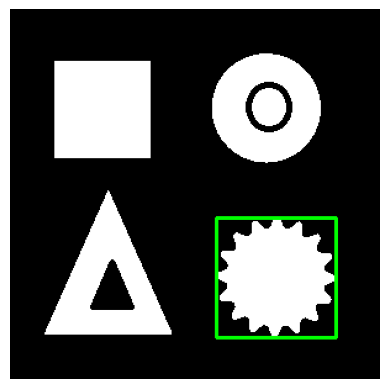

In [7]:
image = cv2.imread("images/shapes.png")
draw_image = image.copy()

### Convert to gray Scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Find Contours
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

### Bounding Rect
x,y,w,h  = cv2.boundingRect(contours[1])
print(x,y,w,h)
### Draw Bounding Rect
cv2.rectangle(draw_image, (x,y), (x+w,y+h), (0,255,0), 2)

### Show Contours
plt.imshow(cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB));
plt.axis("off");

### Bounding Maximum area contour.

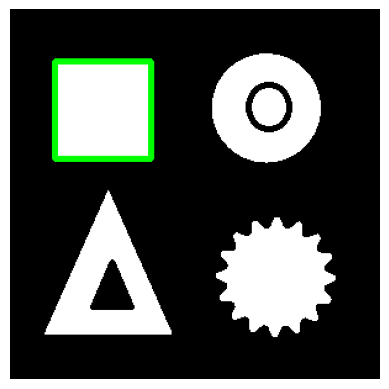

In [8]:
image = cv2.imread("images/shapes.png")
draw_image = image.copy()

### Convert to gray Scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Find Contours
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

### Bounding Rect
x,y,w,h  = cv2.boundingRect(max(contours, key = cv2.contourArea))

### Draw Bounding Rect
cv2.rectangle(draw_image, (x,y), (x+w,y+h), (0,255,0), 3)

### Show Contours
plt.imshow(cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB));
plt.axis("off");

### Straight Bounding Rectangle may overlap with another contour. This is not good. In order to overcome we use Rotated Rectangle. Rotated Rectangle is rectangle drawn such that it is rotated at a angle to enclose the contour minimumly.

## Rotated Rectangle

### Function Syntax:
    retval = cv2.minAreaRect(points)
### Parameters:
    array : It is the input gray-scale image or 2D point set from which the bounding rectangle is to be created.
### Returns:
    retval : A tupple consisting of:
        x,y cordinates of top-left vertex
        w,h of the rectangle
        angle of the rotation
        
        

((209.5, 79.0), (30.0, 27.0), 90.0)
[[196  64]
 [223  64]
 [223  94]
 [196  94]]


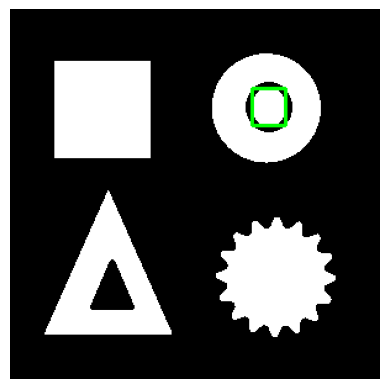

In [9]:
image = cv2.imread("images/shapes.png")

draw_image = image.copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Find Contours
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

### Calculate minimum area Bounding Rect
rect = cv2.minAreaRect(contours[3])

### Check out rect object.
print(rect)

### Convert rect object to int
box = cv2.boxPoints(rect).astype('int')

print(box)
### blur image 
# blur_image = cv2.GaussianBlur(box,(51,51),0)

# draw_image[]
### Draw a rectangle around the object
cv2.drawContours(draw_image, [box], 0, (0,255,0), 2)

### Display the results
plt.imshow(cv2.cvtColor(draw_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

## Drawing Convex Hull

### Function Syntax
    hull = cv2.convexHull(points, hull, clockwise, returnPoints)
### Parameters
    points       : Input 2D point set. This is a single contour.
    clockwise    : Orientation flag. If true convex hull is oriented clockwise else anti-clockwise.
    returnPoints : Operation flag. When flag is true, the function returns convex hull points. Otherwise it returns indices of convex hull points.
### Returns
    hull : Output convex hull.

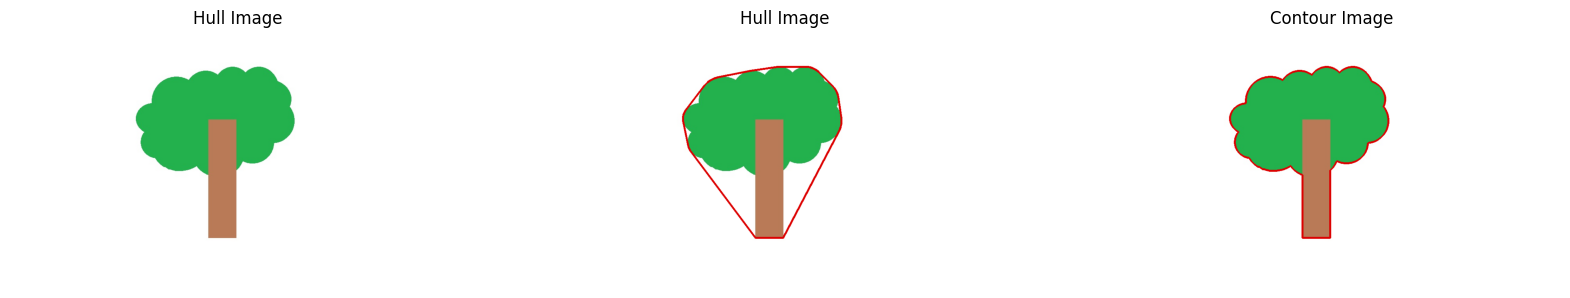

In [10]:
image = cv2.imread("images/tree.jpg")

hull_image = image.copy()
contour_image = image.copy()

### Convert to gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Create a binary threshold
_, binary = cv2.threshold(gray_image, 230,255, cv2.THRESH_BINARY_INV)

### Find the contours from the threshold image
contour,hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### Since image has only one contour. Grab the first contour.
cnt = contour[0]

### Get the required hull.
hull = cv2.convexHull(cnt)

### Draw the hull.
cv2.drawContours(hull_image, [hull], 0, (0,0,220), 3)

### Draw the contour.
cv2.drawContours(contour_image, [cnt], 0 ,(0,0,220), 3)

### Display
plt.figure(figsize=[20,20])
plt.subplot(131);
plt.title("Hull Image");
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));
plt.axis("off");

plt.subplot(132);
plt.title("Hull Image");
plt.imshow(cv2.cvtColor(hull_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

plt.subplot(133);
plt.title("Contour Image");
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB));
plt.axis("off");